In [52]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
pd.set_option('display.max_colwidth', -1)

In [53]:
trainDF = pd.read_csv('data/train_limpio.csv')

In [54]:
trainDF.loc[trainDF.keyword.notnull()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze -,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÂÃÃ Two cars set ablaze: SANTA CRUZ ÂÃÃ Head of the St Elizabeth Police Superintende...,1
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
40,59,ablaze,Live On Webcam,Check these out: #nsfw,0


# TASK-1.0 Mostrar si hay keyboards que tienen más chances de estar en un twit real. (Con al menos uno me alcanza)

In [55]:
chancesOfKeywordBeingRealDF = trainDF.groupby("keyword").agg({"target": ["count", "sum"]})
chancesOfKeywordBeingRealDF["percentage"] = chancesOfKeywordBeingRealDF["target"]["sum"] / chancesOfKeywordBeingRealDF["target"]["count"] * 100
chancesOfKeywordBeingRealDF.columns = ['count', 'sum', 'chances of being real']
chancesOfKeywordBeingRealDF = chancesOfKeywordBeingRealDF.reset_index()
chancesOfKeywordBeingRealDF

,keyword,count,sum,chances of being real
0,ablaze,35,13,37.142857
1,accident,35,24,68.571429
2,aftershock,27,0,0.000000
3,airplane%20accident,33,28,84.848485
4,ambulance,28,13,46.428571
5,annihilated,32,9,28.125000
6,annihilation,21,6,28.571429
7,apocalypse,32,9,28.125000
8,armageddon,42,5,11.904762
9,army,31,5,16.129032


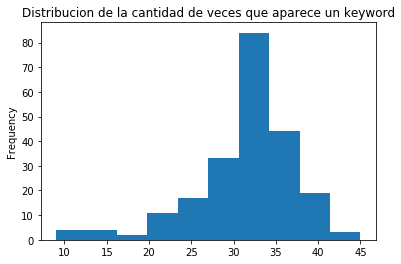

In [56]:
chancesOfKeywordBeingRealDF["count"].plot(kind='hist', title = "Distribucion de la cantidad de veces que aparece un keyword")

### Quiero ver min, max y mean de sum y chances of being real

Text(0.5,1,'Informacion sobre la cantidad de apariciones de las keywords')

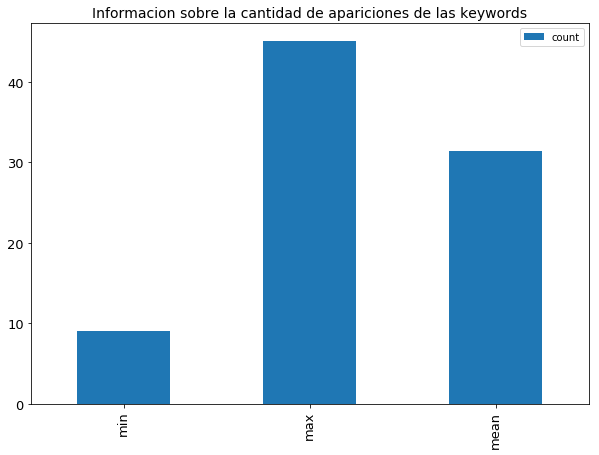

In [57]:
chancesOfKeywordBeingRealBarPlot = chancesOfKeywordBeingRealDF.agg({"count": ["min", "max", "mean"]}).plot(kind ='bar', figsize=(10,7), fontsize=13)
chancesOfKeywordBeingRealBarPlot.set_title('Informacion sobre la cantidad de apariciones de las keywords', fontsize=14)

Text(0.5,1,'Informacion sobre la chance de ser real que tiene un twit relacionado a un keyword')

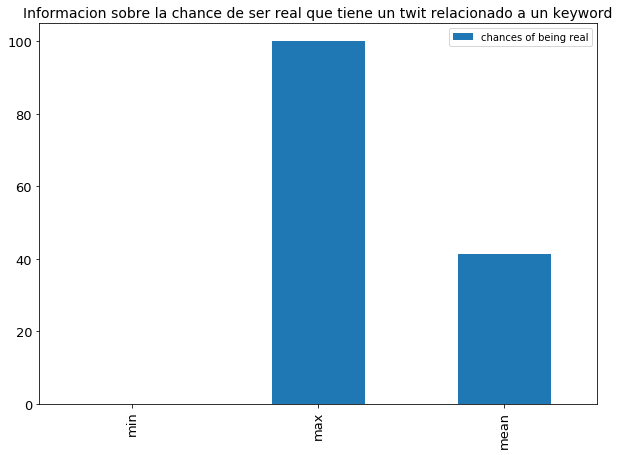

In [58]:
chancesOfKeywordBeingRealDF.agg({"chances of being real": ["min", "max", "mean"]}).plot(kind ='bar', figsize=(10,7), fontsize=13).set_title('Informacion sobre la chance de ser real que tiene un twit relacionado a un keyword', fontsize=14)

### Elimino las keywords con cantidad de apariciones: < 15

Text(0.5,1,'Informacion sobre la chance de ser real que tiene un twit relacionado a un keyword')

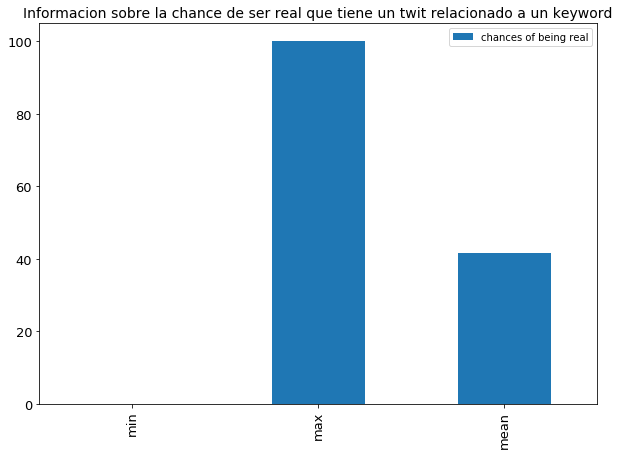

In [59]:
chancesOfKeywordBeingRealDF.loc[chancesOfKeywordBeingRealDF["count"] > 15].agg({"chances of being real": ["min", "max", "mean"]}).plot(kind ='bar', figsize=(10,7), fontsize=13).set_title('Informacion sobre la chance de ser real que tiene un twit relacionado a un keyword', fontsize=14)

### Elimino las keywords con cantidad de apariciones: < 25

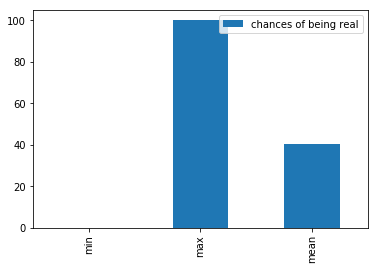

In [60]:
chancesOfKeywordBeingRealDF.loc[chancesOfKeywordBeingRealDF["count"] > 25].agg({"chances of being real": ["min", "max", "mean"]}).plot.bar()

### Elimino las keywords con cantidad de apariciones: < 35

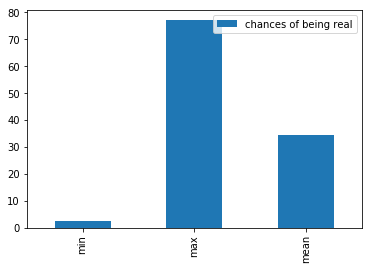

In [61]:
chancesOfKeywordBeingRealDF.loc[chancesOfKeywordBeingRealDF["count"] > 35].agg({"chances of being real": ["min", "max", "mean"]}).plot.bar()

### Elimino las keywords con cantidad de apariciones: < 40

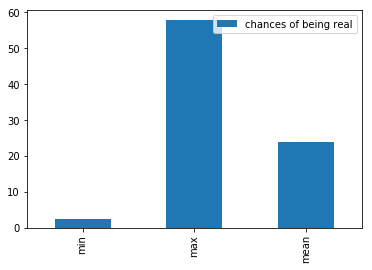

In [62]:
chancesOfKeywordBeingRealDF.loc[chancesOfKeywordBeingRealDF["count"] > 40].agg({"chances of being real": ["min", "max", "mean"]}).plot.bar()

### Elimino las keywords con cantidad de apariciones: > 15

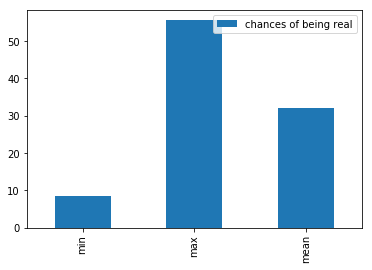

In [63]:
chancesOfKeywordBeingRealDF.loc[chancesOfKeywordBeingRealDF["count"] < 15].agg({"chances of being real": ["min", "max", "mean"]}).plot.bar()

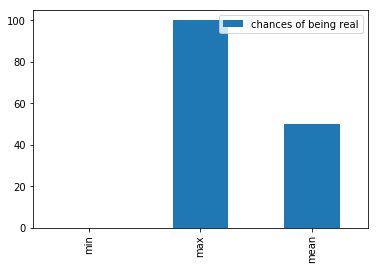

In [64]:
chancesOfKeywordBeingRealDF.loc[chancesOfKeywordBeingRealDF["count"] < 25].agg({"chances of being real": ["min", "max", "mean"]}).plot.bar()

### Hay poca cantidad de keywords con menos de 15 apariciones o más de 35

Text(0.5,1,'top 10 Keywords con mayores chances de ser verdaderos (%)')

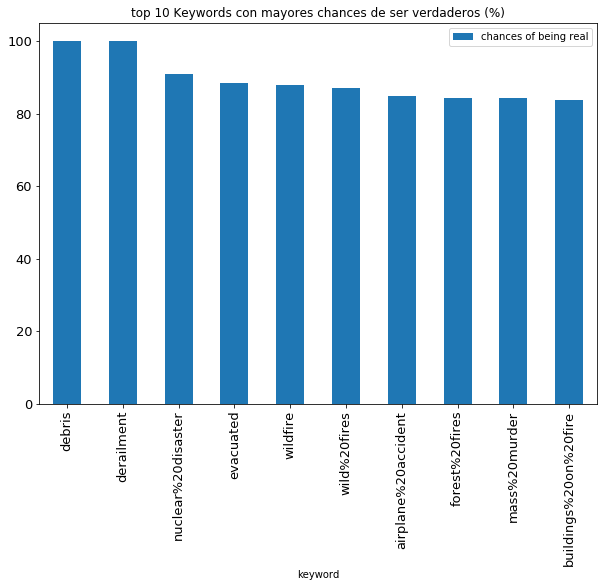

In [65]:
chancesOfKeywordBeingRealDFFiltered = chancesOfKeywordBeingRealDF.loc[lambda x : (x["count"] > 30) & (x["count"] < 40)]
chancesOfKeywordBeingRealDFFiltered.nlargest(10, "chances of being real").plot(kind ='bar', figsize=(10,7), fontsize=13, x="keyword", y="chances of being real").set_title("top 10 Keywords con mayores chances de ser verdaderos (%)")

Text(0.5,1,'top 10 Keywords con mayores chances de no ser verdaderas (%)')

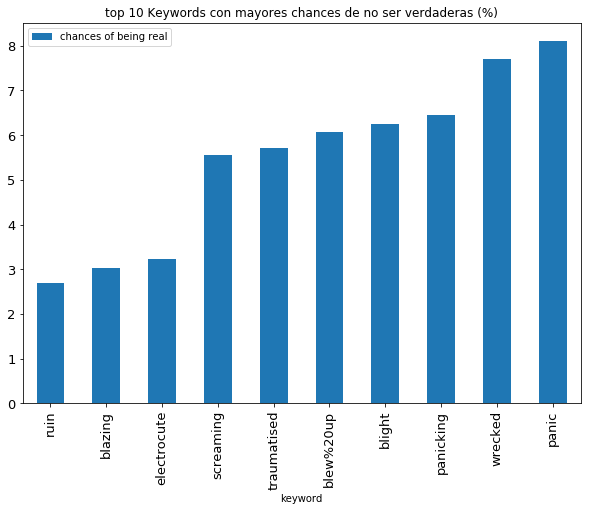

In [66]:
chancesOfKeywordBeingRealDFFiltered.nsmallest(10, "chances of being real").plot(kind ='bar', figsize=(10,7), fontsize=13, x="keyword", y="chances of being real").set_title("top 10 Keywords con mayores chances de no ser verdaderas (%)")

## En keywords con una cantidad comparable de apariciones hay una diferencia muy grande entre las chances que hay de que sean verdaderas o no

# Task-1.1 Mostrar que relación existe entre la aparición (y cantidad) de hashtags y el target

In [67]:
hashtagsDF = trainDF.copy()
hashtagsDF.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [68]:
def removeNotHashtags(listOfWords):
    listOfWords = filter(lambda x: x.startswith("#"), listOfWords)
    return listOfWords

In [69]:
hashtagsDF["text"] = hashtagsDF["text"].apply(lambda x: removeNotHashtags(x.split()))
hashtagsDF.head()

,id,keyword,location,text,target
0,1,NaN,NaN,[#earthquake],1
1,4,NaN,NaN,[],1
2,5,NaN,NaN,[],1
3,6,NaN,NaN,[#wildfires],1
4,7,NaN,NaN,"[#Alaska, #wildfires]",1


In [70]:
hashTagTargetDic = {}
def addToDic(row):
    for word in row[3]:
        if word in hashTagTargetDic:
            hashTagTargetDic[word] = hashTagTargetDic[word] + [row[4]]
        else:
            hashTagTargetDic[word] = [row[4]]
    return row

In [71]:
hashtagsDF.apply(addToDic, axis=1)

,id,keyword,location,text,target
0,1,NaN,NaN,[#earthquake],1
1,4,NaN,NaN,[],1
2,5,NaN,NaN,[],1
3,6,NaN,NaN,[#wildfires],1
4,7,NaN,NaN,"[#Alaska, #wildfires]",1
5,8,NaN,NaN,"[#RockyFire, #CAfire, #wildfires]",1
6,10,NaN,NaN,"[#flood, #disaster]",1
7,13,NaN,NaN,[],1
8,14,NaN,NaN,[],1
9,15,NaN,NaN,[],1


In [72]:
hashTagTargetDic

{'#Love': [0, 0],
 '#RAmag.': [0],
 '#EverydayNaija': [1],
 '#gadgets': [1, 0],
 '#Entertainment': [0],
 '#OTRAMETLIFE': [0, 0, 0, 1],
 '#Medinah': [1],
 '#okwx': [1, 1, 1, 1, 1, 1],
 '#Benediction': [0],
 '#casualties': [0],
 '#WholesaleEnt': [0],
 '#trollingtilMeekdiss': [0],
 '#Live': [0],
 '#Tb': [0],
 '#world': [0, 0, 1, 1, 1, 1, 1],
 '#cndpoli': [1],
 '#TS': [1],
 '#BREAKING:': [1, 1],
 '#TY': [0],
 '#download': [1],
 '#Niagara.Vehicles': [1],
 '#SuryaRay': [1],
 '#IranDeal.': [0],
 '#MusicAdvisory': [0],
 '#lawx': [1],
 '#EMS': [0, 1],
 '#tattoo': [1],
 '#fresno': [1],
 '#CLE': [0],
 '#vaginaorcake': [1],
 '#Metepec': [1],
 '#bookmobile': [0],
 '#Clip!': [0],
 '#UFO4UBlogEurope': [1],
 '#Halifax': [0],
 '#Wildfire': [1, 1, 1],
 '#yycfringe': [1],
 '#SummerFate': [0, 0, 0, 0],
 '#Megaquake': [1],
 '#psychrewatch': [0],
 '#icelandreview': [1],
 '#askH3cz': [0],
 '#BishopFred': [0],
 '#Japanjapan': [1],
 '#AllLivesMatter': [0, 0],
 '#FX': [0],
 '#FR': [1],
 '#Modi': [0, 1],
 '#porn

In [73]:
hashTagTargetDicDF = pd.DataFrame(list(hashTagTargetDic.items()),columns = ['keyword','targets']) 
hashTagTargetDicDF.head()

,keyword,targets
0,#Love,"[0, 0]"
1,#RAmag.,[0]
2,#EverydayNaija,[1]
3,#gadgets,"[1, 0]"
4,#Entertainment,[0]


In [74]:
hashTagTargetDicDF["apariciones"] = hashTagTargetDicDF["targets"].map(lambda x: len(x))
hashTagTargetDicDF.head()

,keyword,targets,apariciones
0,#Love,"[0, 0]",2
1,#RAmag.,[0],1
2,#EverydayNaija,[1],1
3,#gadgets,"[1, 0]",2
4,#Entertainment,[0],1


In [75]:
hashTagTargetDicDF["verdaderos"] = hashTagTargetDicDF["targets"].map(lambda x: sum(x))
hashTagTargetDicDF.head()

,keyword,targets,apariciones,verdaderos
0,#Love,"[0, 0]",2,0
1,#RAmag.,[0],1,0
2,#EverydayNaija,[1],1,1
3,#gadgets,"[1, 0]",2,1
4,#Entertainment,[0],1,0


In [76]:
hashTagTargetDicDF["chances de ser verdadero"] = hashTagTargetDicDF["verdaderos"] / hashTagTargetDicDF["apariciones"] * 100
hashTagTargetDicDF["chances de ser verdadero"] = hashTagTargetDicDF["chances de ser verdadero"].map(lambda x : 0 if( x == np.inf) else x)
hashTagTargetDicDF.head()

,keyword,targets,apariciones,verdaderos,chances de ser verdadero
0,#Love,"[0, 0]",2,0,0.0
1,#RAmag.,[0],1,0,0.0
2,#EverydayNaija,[1],1,1,100.0
3,#gadgets,"[1, 0]",2,1,50.0
4,#Entertainment,[0],1,0,0.0


In [77]:
hashTagTargetDicDF.nlargest(10, "apariciones")

,keyword,targets,apariciones,verdaderos,chances de ser verdadero
342,#news,"[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]",34,19,55.882353
733,#News,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]",27,25,92.592593
1918,#Hiroshima,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",20,20,100.000000
2078,#???,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",17,17,100.000000
1055,#GBBO,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]",16,4,25.000000
1538,#??,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]",15,14,93.333333
411,#nowplaying,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",10,0,0.000000
1192,#NowPlaying,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",10,1,10.000000
1408,#Sismo,"[1, 1, 1, 0, 1, 1, 1, 1, 1, 1]",10,9,90.000000
132,#yyc,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",9,9,100.000000


### Voy a filtrar los que tengan menos de 5 apariciones

In [78]:
hashTagTargetDicDFFiltered = hashTagTargetDicDF.loc[hashTagTargetDicDF["apariciones"] > 5]

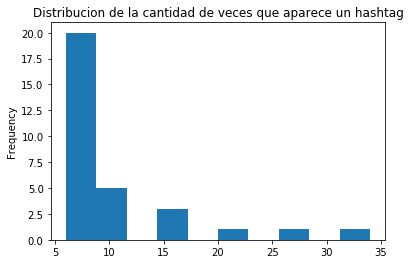

In [79]:
hashTagTargetDicDFFiltered["apariciones"].plot(kind='hist', title = "Distribucion de la cantidad de veces que aparece un hashtag")

In [80]:
hashTagTargetDicDFFiltered

,keyword,targets,apariciones,verdaderos,chances de ser verdadero
7,#okwx,"[1, 1, 1, 1, 1, 1]",6,6,100.000000
14,#world,"[0, 0, 1, 1, 1, 1, 1]",7,5,71.428571
70,#drought,"[1, 1, 0, 1, 1, 1]",6,5,83.333333
111,#course,"[1, 1, 0, 0, 0, 0]",6,2,33.333333
124,#WX,"[1, 1, 1, 1, 1, 1, 1]",7,7,100.000000
132,#yyc,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",9,9,100.000000
170,#Nursing,"[0, 1, 1, 0, 0, 0, 0, 0]",8,2,25.000000
341,#Beyhive,"[0, 0, 0, 0, 0, 0, 0, 0]",8,0,0.000000
342,#news,"[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]",34,19,55.882353
411,#nowplaying,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",10,0,0.000000


In [81]:
hashTagTargetDicDFFiltered.nsmallest(10, "apariciones")

,keyword,targets,apariciones,verdaderos,chances de ser verdadero
7,#okwx,"[1, 1, 1, 1, 1, 1]",6,6,100.000000
70,#drought,"[1, 1, 0, 1, 1, 1]",6,5,83.333333
111,#course,"[1, 1, 0, 0, 0, 0]",6,2,33.333333
964,#Fukushima,"[1, 1, 1, 1, 1, 1]",6,6,100.000000
1065,#Antioch,"[1, 1, 1, 1, 1, 1]",6,6,100.000000
1149,#ÂÃ_,"[1, 0, 0, 1, 1, 1]",6,4,66.666667
1808,#MTVHottest,"[0, 0, 1, 0, 0, 0]",6,1,16.666667
1935,#US,"[0, 0, 1, 1, 1, 0]",6,3,50.000000
14,#world,"[0, 0, 1, 1, 1, 1, 1]",7,5,71.428571
124,#WX,"[1, 1, 1, 1, 1, 1, 1]",7,7,100.000000


Text(0.5,1,'top 10 Hashtags con mas apariciones')

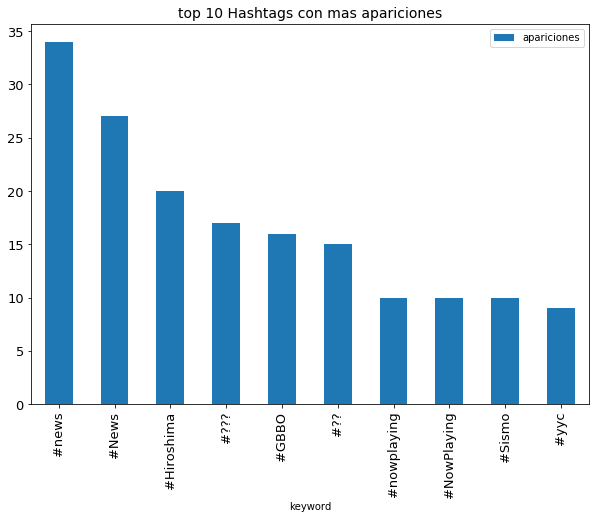

In [82]:
hashtagOccurrencesBarPlot = hashTagTargetDicDFFiltered.nlargest(10, "apariciones").plot(kind ='bar', figsize=(10,7), fontsize=13, x="keyword", y="apariciones")
hashtagOccurrencesBarPlot.set_title('top 10 Hashtags con mas apariciones', fontsize=14)


Text(0.5,1,'top 10 Hashtags con mas chances de ser verdaderos')

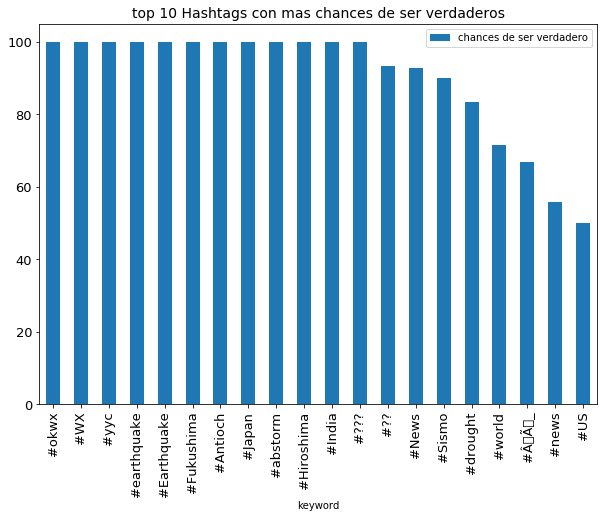

In [83]:
hashtagTruthBarPlot = hashTagTargetDicDFFiltered.nlargest(20, "chances de ser verdadero").plot(kind ='bar', figsize=(10,7), fontsize=13, x="keyword", y="chances de ser verdadero")
hashtagTruthBarPlot.set_title('top 10 Hashtags con mas chances de ser verdaderos', fontsize=14)

Text(0.5,1,'top 10 Hashtags con menos chances de ser verdaderos')

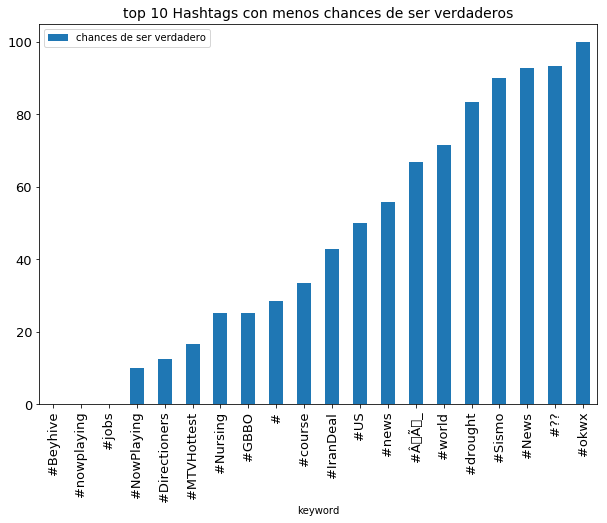

In [84]:
hashtagNotTruthBarPlot = hashTagTargetDicDFFiltered.nsmallest(20, "chances de ser verdadero").plot(kind ='bar', figsize=(10,7), fontsize=13, x="keyword", y="chances de ser verdadero")
hashtagNotTruthBarPlot.set_title('top 10 Hashtags con menos chances de ser verdaderos', fontsize=14)

# Task-1.1 Task-1.2 Mostrar si hay locations con más chances de que aparezcan twits reales

In [85]:
locationsDF = trainDF.copy()

In [86]:
locationsDF = locationsDF.loc[locationsDF.location.notnull()]
locationsDF.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba.,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,0


In [87]:
locationsGroupedDF = locationsDF.groupby("location").agg({"target": ["sum", "count"]}).reset_index()
locationsGroupedDF.columns = ["location", "target_sum", "count"]

In [88]:
locationsGroupedDF.head()

,location,target_sum,count
0,,1,1
1,Glasgow,0,1
2,"Melbourne, Australia",0,1
3,Ã¥_,0,1
4,45Ã¥Â¡ 5'12.53N 14Ã¥Â¡ 7'24.93E,0,1


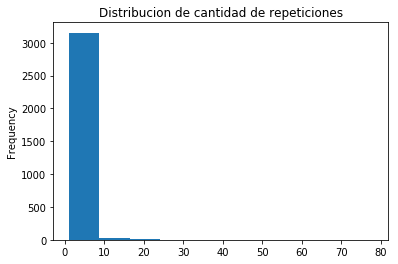

In [89]:
locationsGroupedDF["count"].plot(kind='hist', title='Distribucion de cantidad de repeticiones')

In [90]:
locationsGroupedDF["chances de ser verdadero"] = locationsGroupedDF["target_sum"] / locationsGroupedDF["count"] * 100
locationsGroupedDF = locationsGroupedDF.loc[locationsGroupedDF["count"] > 5]

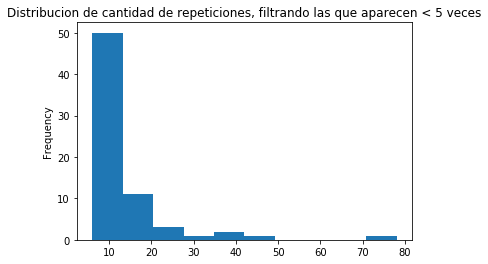

In [91]:
locationsGroupedDF["count"].plot(kind='hist', title='Distribucion de cantidad de repeticiones, filtrando las que aparecen < 5 veces')

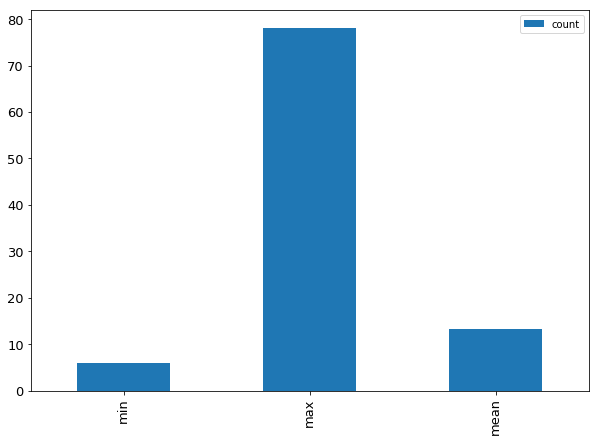

In [92]:
locationsGroupedDF.agg({"count": ["min", "max", "mean"]}).plot(kind ='bar', figsize=(10,7), fontsize=13)

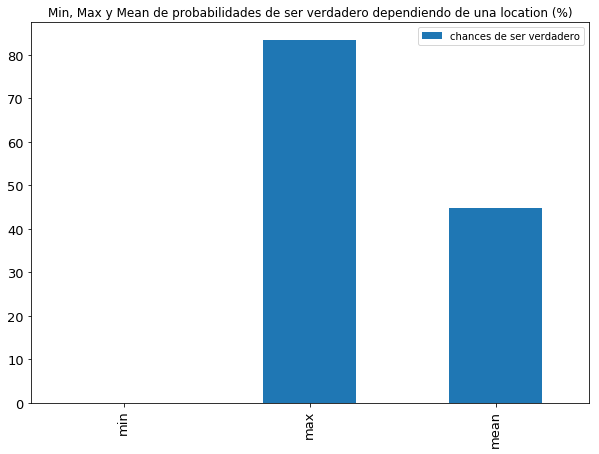

In [97]:
locationsGroupedDF.agg({"chances de ser verdadero": ["min", "max", "mean"]}).plot(kind ='bar', figsize=(10,7), fontsize=13, title="Min, Max y Mean de probabilidades de ser verdadero dependiendo de una location (%)")

Text(0.5,1,'top 10 Locations con mas chances de ser verdaderos (%)')

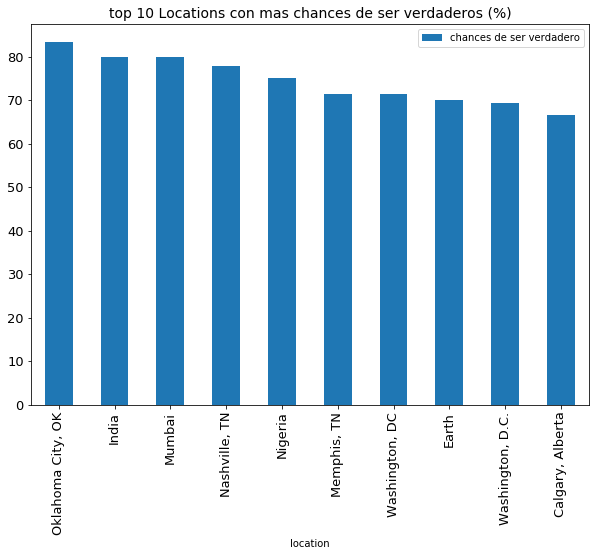

In [94]:
locationTruthBarPlot = locationsGroupedDF.nlargest(10, "chances de ser verdadero").plot(kind ='bar', figsize=(10,7), fontsize=13, x="location", y="chances de ser verdadero")
locationTruthBarPlot.set_title('top 10 Locations con mas chances de ser verdaderos (%)', fontsize=14)

Text(0.5,1,'top 10 Locations con menos chances de ser verdaderos (%)')

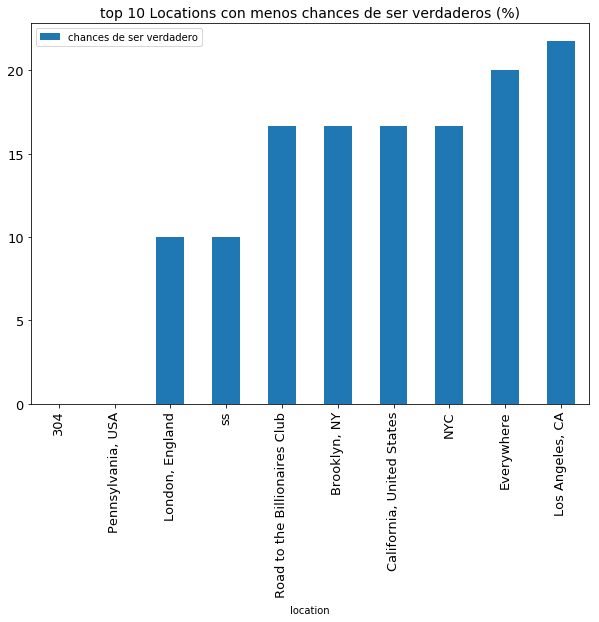

In [95]:
locationNotTruthBarPlot = locationsGroupedDF.nsmallest(10, "chances de ser verdadero").plot(kind ='bar', figsize=(10,7), fontsize=13, x="location", y="chances de ser verdadero")
locationNotTruthBarPlot.set_title('top 10 Locations con menos chances de ser verdaderos (%)', fontsize=14)

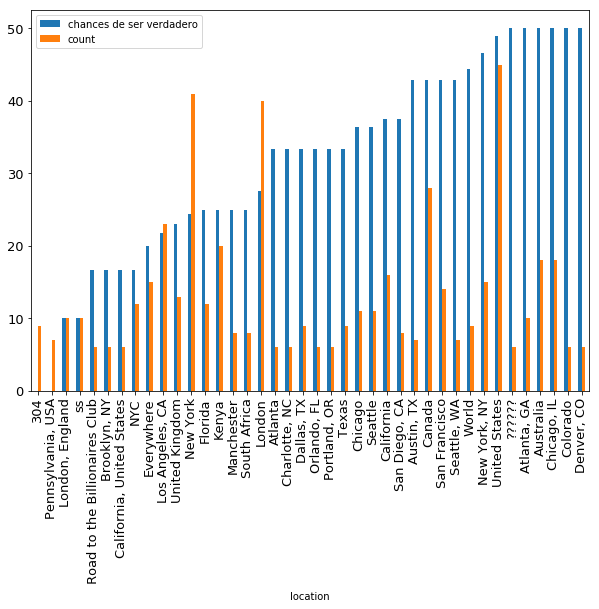

In [96]:
locationsGroupedDF.nsmallest(40, "chances de ser verdadero").plot(kind ='bar', figsize=(10,7), fontsize=13, x="location", y=["chances de ser verdadero", "count"])